### Astrobase core stuff

This notebook describes how to use the the `hatlc`, `periodbase`, and `plotbase` modules to read in HAT light curves, run period searches, and plot the results. The `nb-data` subdirectory in the `notebooks` folder contains some sample HAT light curves to use for this work.

## Importing modules

In [1]:
%matplotlib inline
from astrobase import hatlc, periodbase, plotbase

## Reading HAT light curves

In [2]:
ls nb-data

HAT-772-0554686-V0-DR0-hatlc.sqlite.gz  HAT-777-0058978-V0-DR0-hatlc.sqlite.gz


In [4]:
# the hatlc module read_and_filter_sqlitecurve function is used to read these
# this returns a dict with the light curve columns and info and a message indicating status of the LC read operation
lcd, msg = hatlc.read_and_filter_sqlitecurve('nb-data/HAT-772-0554686-V0-DR0-hatlc.sqlite.gz')

2016-12-19T22:45:24.507772Z [INFO]: retrieving all latest columns
2016-12-19T22:45:24.507997Z [INFO]: no LC filters specified


In [5]:
# we can get a description of the light curve using the hatlc.describe function
hatlc.describe(lcd)

OBJECT
------

objectid = HAT-772-0554686
hatid = HAT-772-0554686; twomassid = 14374811-5648595
network = HS; stations = HS02,HS04,HS06; ndet = 11261

ra = 219.450491; decl = -56.816551
pmra = 3.6; pmra_err = 2.9
pmdecl = -6.2; pmdecl_err = 2.9

jmag = 13.303; hmag = 12.65; kmag = 12.461; bmag = 17.744; vmag = 16.083
sdssg = 16.867; sdssr = 15.648; sdssi = 14.909

METADATA
--------

datarelease = 0; lcversion = 0
lastupdated = 1479866909.288; lcserver = 5b81c8c
comment = initial HS lightcurve creation
lcbestaperture = {"ap": ["002"], "ism": ["002"]}
lcsortcol = rjd
lcfiltersql = 
lcnormcols = 

CAMFILTERS
----------

7 - r - Sloan r AST0285
15 - r - Sloan r SN073 AST0285
23 - r - Sloan r SN081 AST0285


PHOTAPERTURES
-------------

000 - 2.05 px
001 - 3.00 px
002 - 4.00 px

LIGHT CURVE COLUMNS
-------------------

000 - rjd - time of observation in Reduced Julian date (JD = 2400000.0 + RJD)
001 - bjd - time of observation in Baryocentric Julian date (note: this is BJD_TDB)
002 - net - 

In [6]:
# the columns are all numpy arrays
lcd['rjd']

array([ 56092.6405579,  56092.6463396,  56140.5295653, ...,  56920.4836559,
        56920.8740464,  56921.4836334])

## Running period finding operations

In [8]:
# first, we normalize the light curve, i.e. make sure all observations are at the same zero-point.
# this is usually required for very long time-base HATNet light curves since these include different instrument
# combinations over the decade of survey operations.
normlcd = hatlc.normalize_lcdict(lcd)

/home/wbhatti/astrowork/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/wbhatti/astrowork/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
# next, break out the columns we'll use for the period-finding
# we'll use reduced JD as the times, 
# EPD magnitude in the smallest aperture as the mags, 
# and magnitude errors in the smallest aperture as the errs
times, mags, errs = normlcd['rjd'], normlcd['aep_000'], normlcd['aie_000']

In [11]:
# let's run Lomb-Scargle
glsp = periodbase.pgen_lsp(times,mags,errs)

2016-12-19T19:41:08.966702Z [INFO]: sigclip = 10.0: before = 11261 observations, after = 10979 observations
2016-12-19T19:41:08.967518Z [INFO]: using autofreq with 41438 frequency points, start P = 0.100, end P = 828.843
2016-12-19T19:41:08.967579Z [INFO]: using 4 workers...


In [13]:
# let's make a checkplot to see the periods associated with the best spectrogram peaks
# this also gives a quick overview of the object information and gets a finder chart from NASA's SkyView service
cp = plotbase.make_checkplot(glsp, times, mags, errs, objectinfo=normlcd['objectinfo'])

2016-12-19T19:42:29.675385Z [INFO]: adding in object information and finder chart for HAT-772-0554686 at RA: 219.450, DEC: -56.817


/home/wbhatti/astrowork/lib/python2.7/site-packages/astroquery/utils/commons.py:187: UserWarning: Coordinate string is being interpreted as an ICRS coordinate.
  warnings.warn("Coordinate string is being interpreted as an "


2016-12-19T19:42:30.671011Z [INFO]: sigclip = 4.0: before = 11261 observations, after = 10565 observations
2016-12-19T19:42:30.717911Z [INFO]: sigclip = 30.0: before = 10565 observations, after = 10565 observations
2016-12-19T19:42:30.721907Z [INFO]: spline fit done. nknots = 100,  chisq = 26606.49762, reduced chisq = 2.54267
2016-12-19T19:42:30.721987Z [INFO]: plotting phased LC with period 1.542895, epoch 56834.86481
2016-12-19T19:42:31.898977Z [INFO]: plotting phased LC with period 0.771447, epoch 56834.86481
2016-12-19T19:42:33.053473Z [INFO]: plotting phased LC with period 3.085790, epoch 56834.86481
2016-12-19T19:42:34.133611Z [INFO]: plotting phased LC with period 0.771447, epoch 56834.86481
2016-12-19T19:42:35.210294Z [INFO]: plotting phased LC with period 0.514234, epoch 56834.86481
2016-12-19T19:42:36.303693Z [INFO]: plotting phased LC with period 3.085790, epoch 56834.86481
2016-12-19T19:42:37.448415Z [INFO]: plotting phased LC with period 0.385473, epoch 56834.86481


/home/wbhatti/astrowork/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


2016-12-19T19:42:41.110283Z [INFO]: checkplot done -> checkplot.png


In [14]:
# to see the checkplot, let's use ipython's built in image viewer
from IPython.display import Image

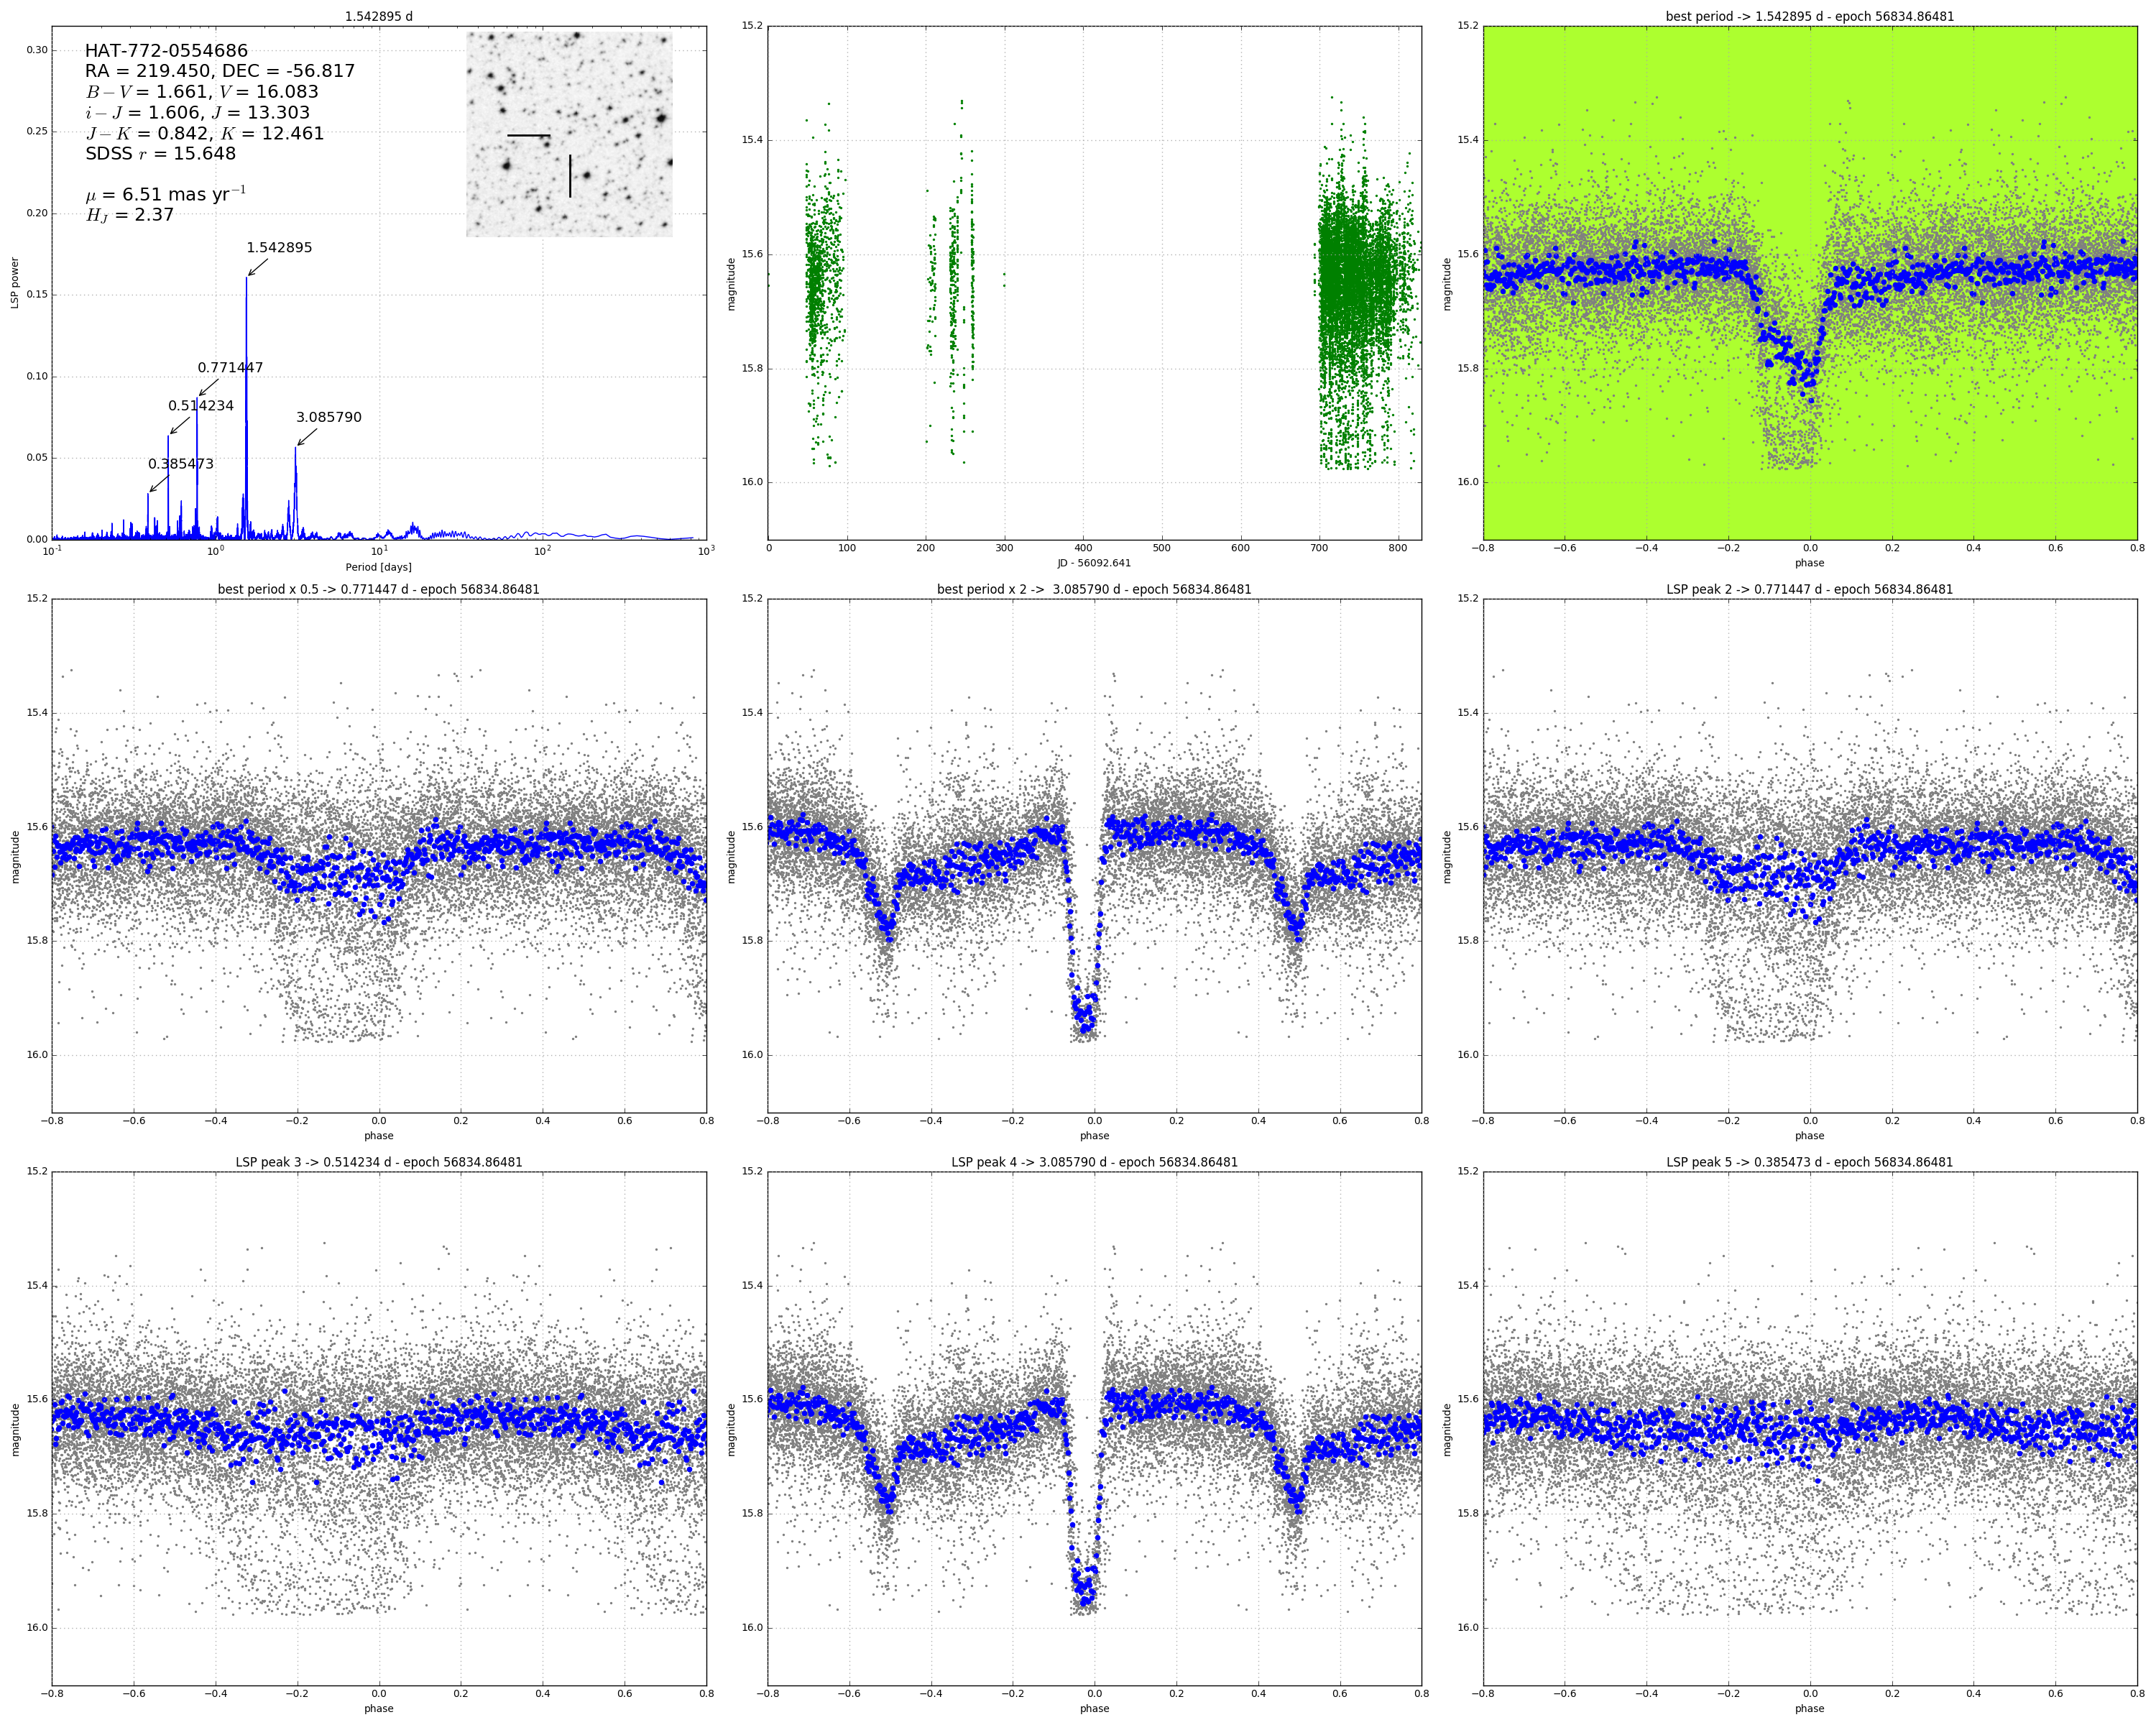

In [15]:
Image('checkplot.png')

In [16]:
# the Generalized Lomb-Scargle usually gets the period wrong for eclipsing binaries as this object appears to be
# let's try the Stellingwerf Phase-Dispersion Minimization method instead
spdm = periodbase.stellingwerf_pdm(times,mags,errs)

2016-12-19T19:45:59.698268Z [INFO]: sigclip = 10.0: before = 11261 observations, after = 10979 observations
2016-12-19T19:45:59.698835Z [INFO]: using autofreq with 41438 frequency points, start P = 0.100, end P = 828.843
2016-12-19T19:45:59.698875Z [INFO]: using 4 workers...


2016-12-19T19:47:01.126542Z [INFO]: adding in object information and finder chart for HAT-772-0554686 at RA: 219.450, DEC: -56.817
2016-12-19T19:47:01.714887Z [INFO]: sigclip = 4.0: before = 11261 observations, after = 10565 observations
2016-12-19T19:47:01.760907Z [INFO]: sigclip = 30.0: before = 10565 observations, after = 10565 observations
2016-12-19T19:47:01.764794Z [INFO]: spline fit done. nknots = 100,  chisq = 20324.08310, reduced chisq = 1.94229
2016-12-19T19:47:01.764866Z [INFO]: plotting phased LC with period 3.085790, epoch 56856.38349
2016-12-19T19:47:02.853927Z [INFO]: plotting phased LC with period 1.542895, epoch 56856.38349
2016-12-19T19:47:03.959062Z [INFO]: plotting phased LC with period 6.171579, epoch 56856.38349
2016-12-19T19:47:05.032230Z [INFO]: plotting phased LC with period 1.542895, epoch 56856.38349
2016-12-19T19:47:06.197716Z [INFO]: plotting phased LC with period 6.157824, epoch 56856.38349
2016-12-19T19:47:07.271911Z [INFO]: plotting phased LC with period

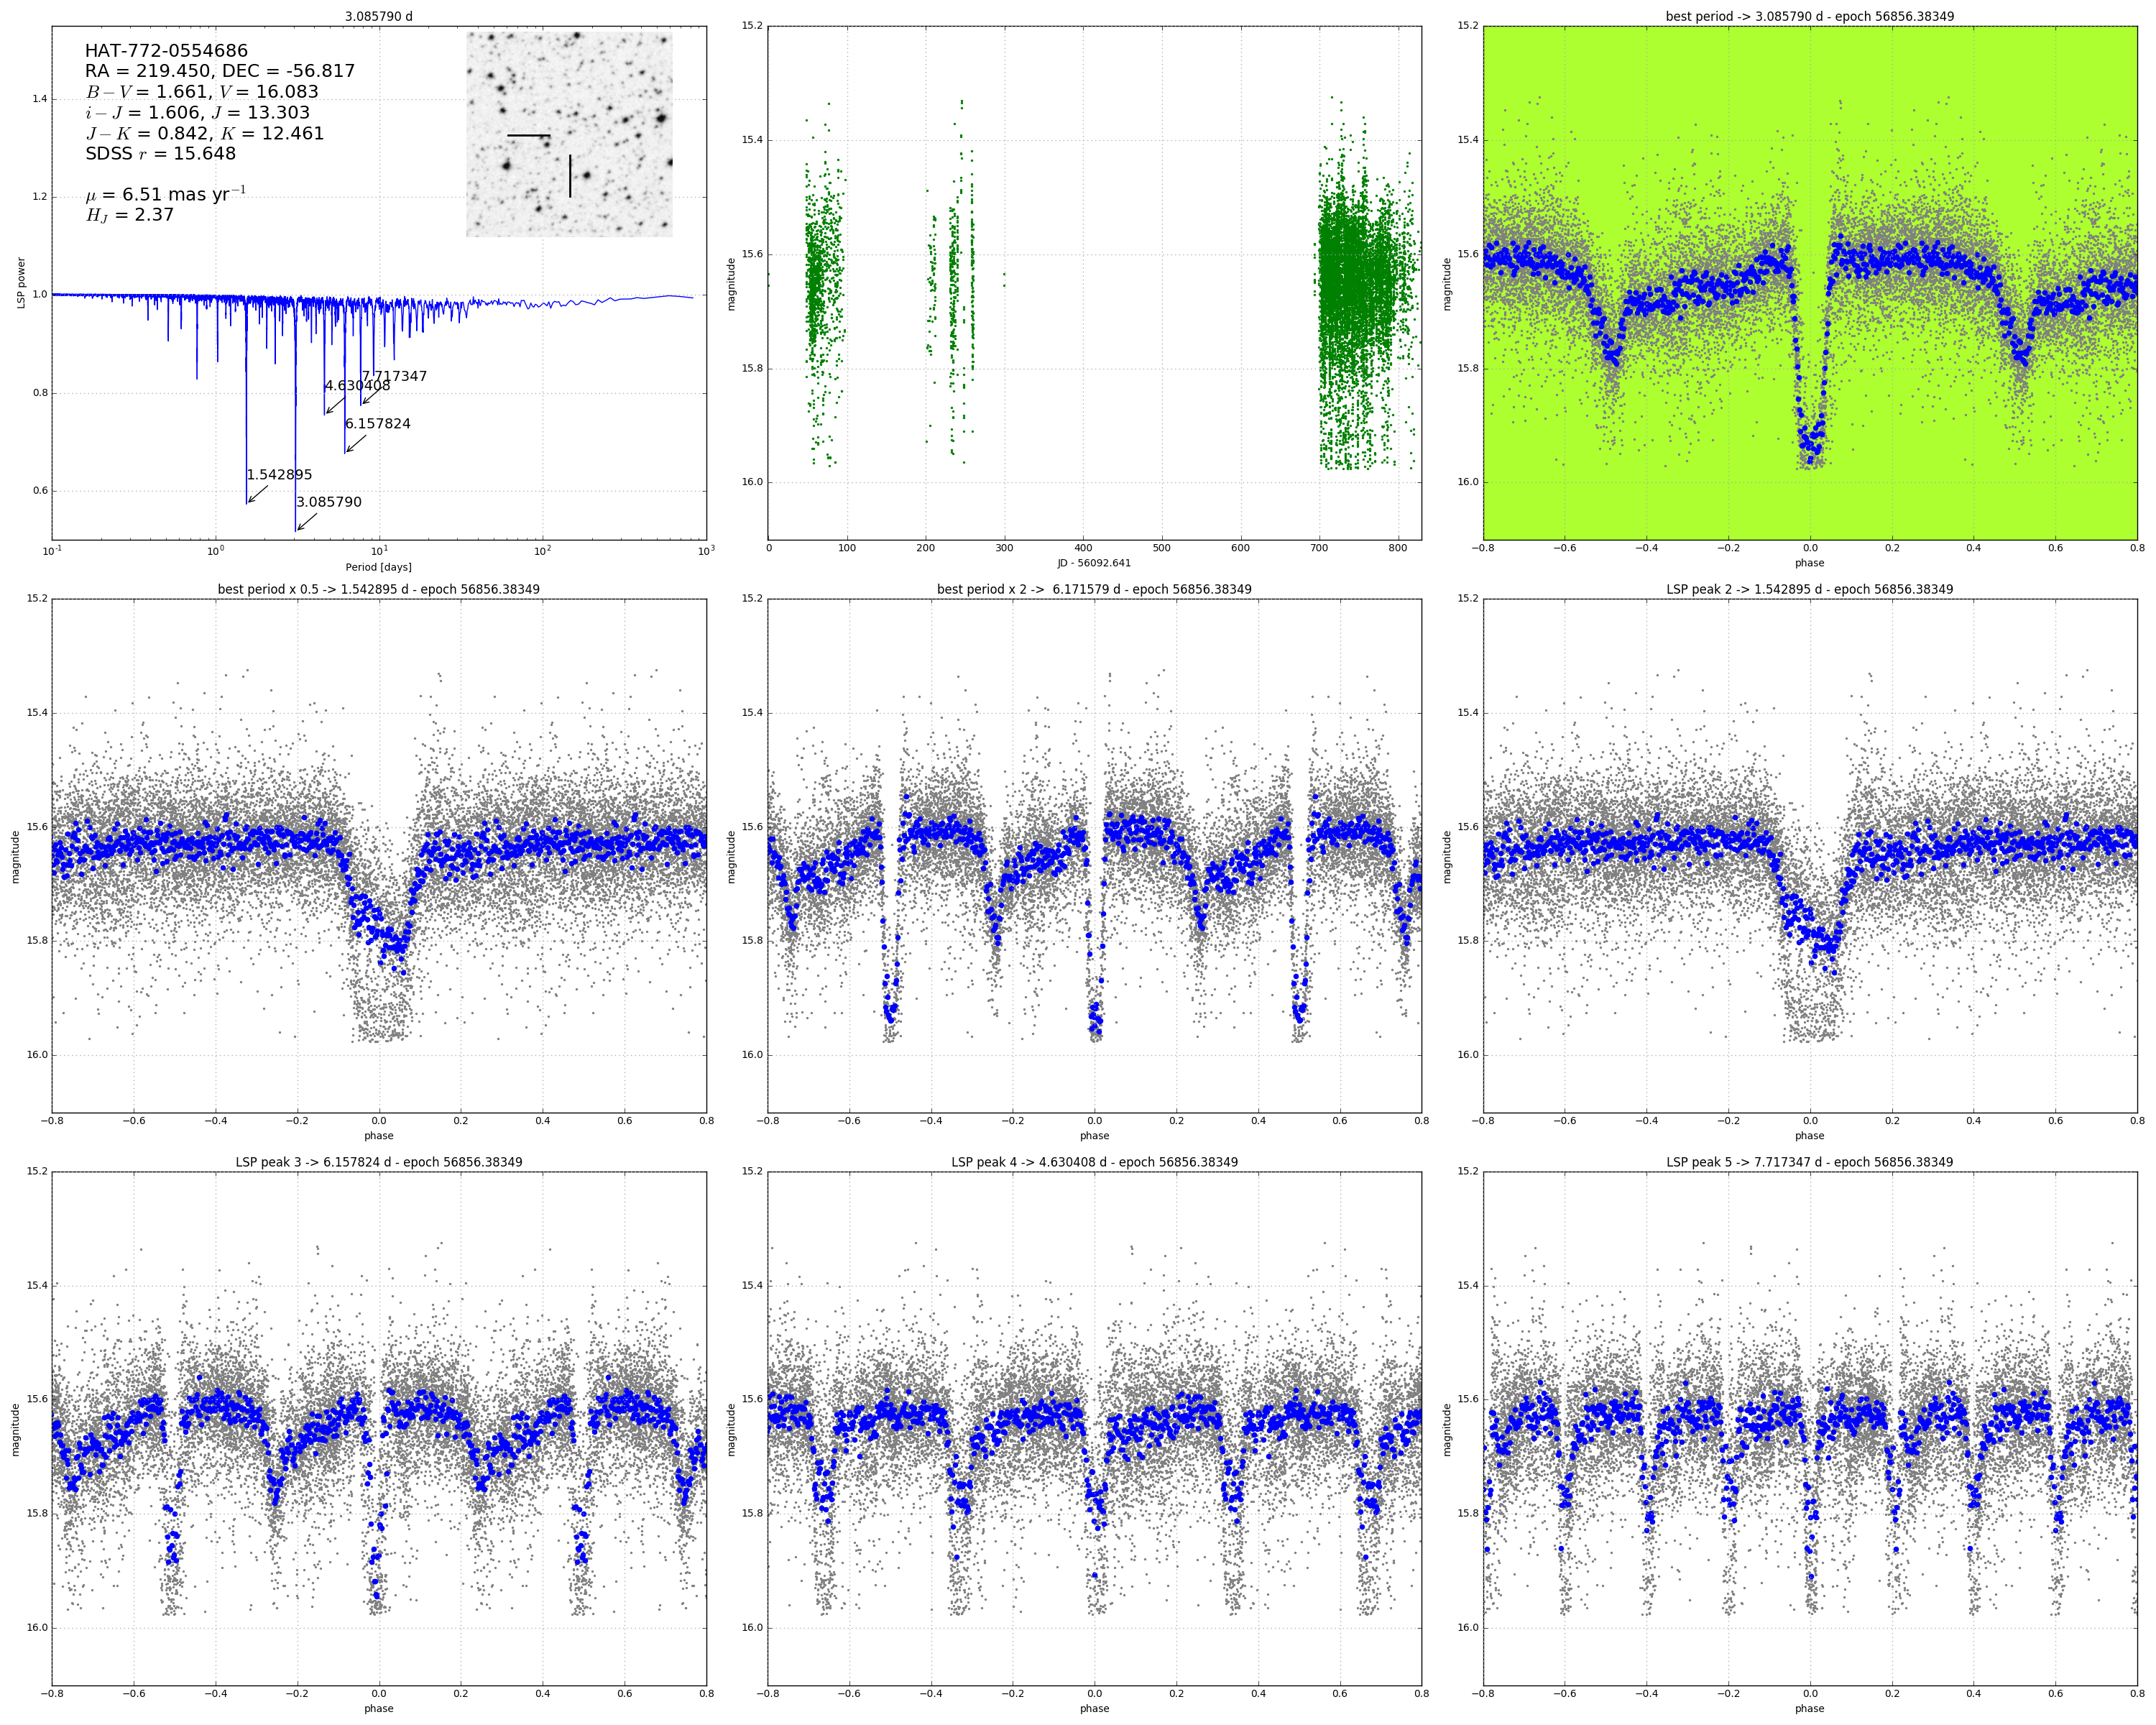

In [17]:
# make the checkplot again
cp = plotbase.make_checkplot(spdm, times, mags, errs, objectinfo=normlcd['objectinfo'])
Image('checkplot.png')

In [18]:
# that looks OK. let's check using the Box-Least-Squares fitting algorithm by Kovacs et al. (2002)
# let's set the start period to 1.0 days to cut down on the computation we have to do on this poor 4-core machine
blsp = periodbase.bls_parallel_pfind(times,mags,errs,startp=1.0)

2016-12-19T19:48:38.215163Z [INFO]: sigclip = 10.0: before = 11261 observations, after = 10979 observations
2016-12-19T19:48:38.215346Z [INFO]: autofreq: using stepsize: 3.01625250171e-06, min P: 1.0, max P: 100.0, nfreq: 328222, nphasebins: 200, min transit duration: 0.01, max transit duration: 0.8
2016-12-19T19:48:38.215494Z [INFO]: autofreq: minfreq: 0.01, maxfreq: 1.0
2016-12-19T19:48:38.215574Z [INFO]: using 4 workers...
2016-12-19T19:48:38.218278Z [INFO]: worker 1: minfreq = 0.010, nfreqs = 82056
2016-12-19T19:48:38.218337Z [INFO]: worker 2: minfreq = 0.258, nfreqs = 82056
2016-12-19T19:48:38.218365Z [INFO]: worker 3: minfreq = 0.505, nfreqs = 82056
2016-12-19T19:48:38.218401Z [INFO]: worker 4: minfreq = 0.753, nfreqs = 82054
2016-12-19T19:48:38.218425Z [INFO]: running...


2016-12-19T19:49:24.048542Z [INFO]: adding in object information and finder chart for HAT-772-0554686 at RA: 219.450, DEC: -56.817
2016-12-19T19:49:24.588471Z [INFO]: sigclip = 4.0: before = 11261 observations, after = 10565 observations
2016-12-19T19:49:24.633918Z [INFO]: sigclip = 30.0: before = 10565 observations, after = 10565 observations
2016-12-19T19:49:24.637762Z [INFO]: spline fit done. nknots = 100,  chisq = 19541.65218, reduced chisq = 1.86751
2016-12-19T19:49:24.637833Z [INFO]: plotting phased LC with period 3.085607, epoch 56794.66055
2016-12-19T19:49:25.837775Z [INFO]: plotting phased LC with period 1.542803, epoch 56794.66055
2016-12-19T19:49:26.916974Z [INFO]: plotting phased LC with period 6.171213, epoch 56794.66055
2016-12-19T19:49:28.016709Z [INFO]: plotting phased LC with period 1.542756, epoch 56794.66055
2016-12-19T19:49:29.099063Z [INFO]: plotting phased LC with period 6.171077, epoch 56794.66055
2016-12-19T19:49:30.260928Z [INFO]: plotting phased LC with period

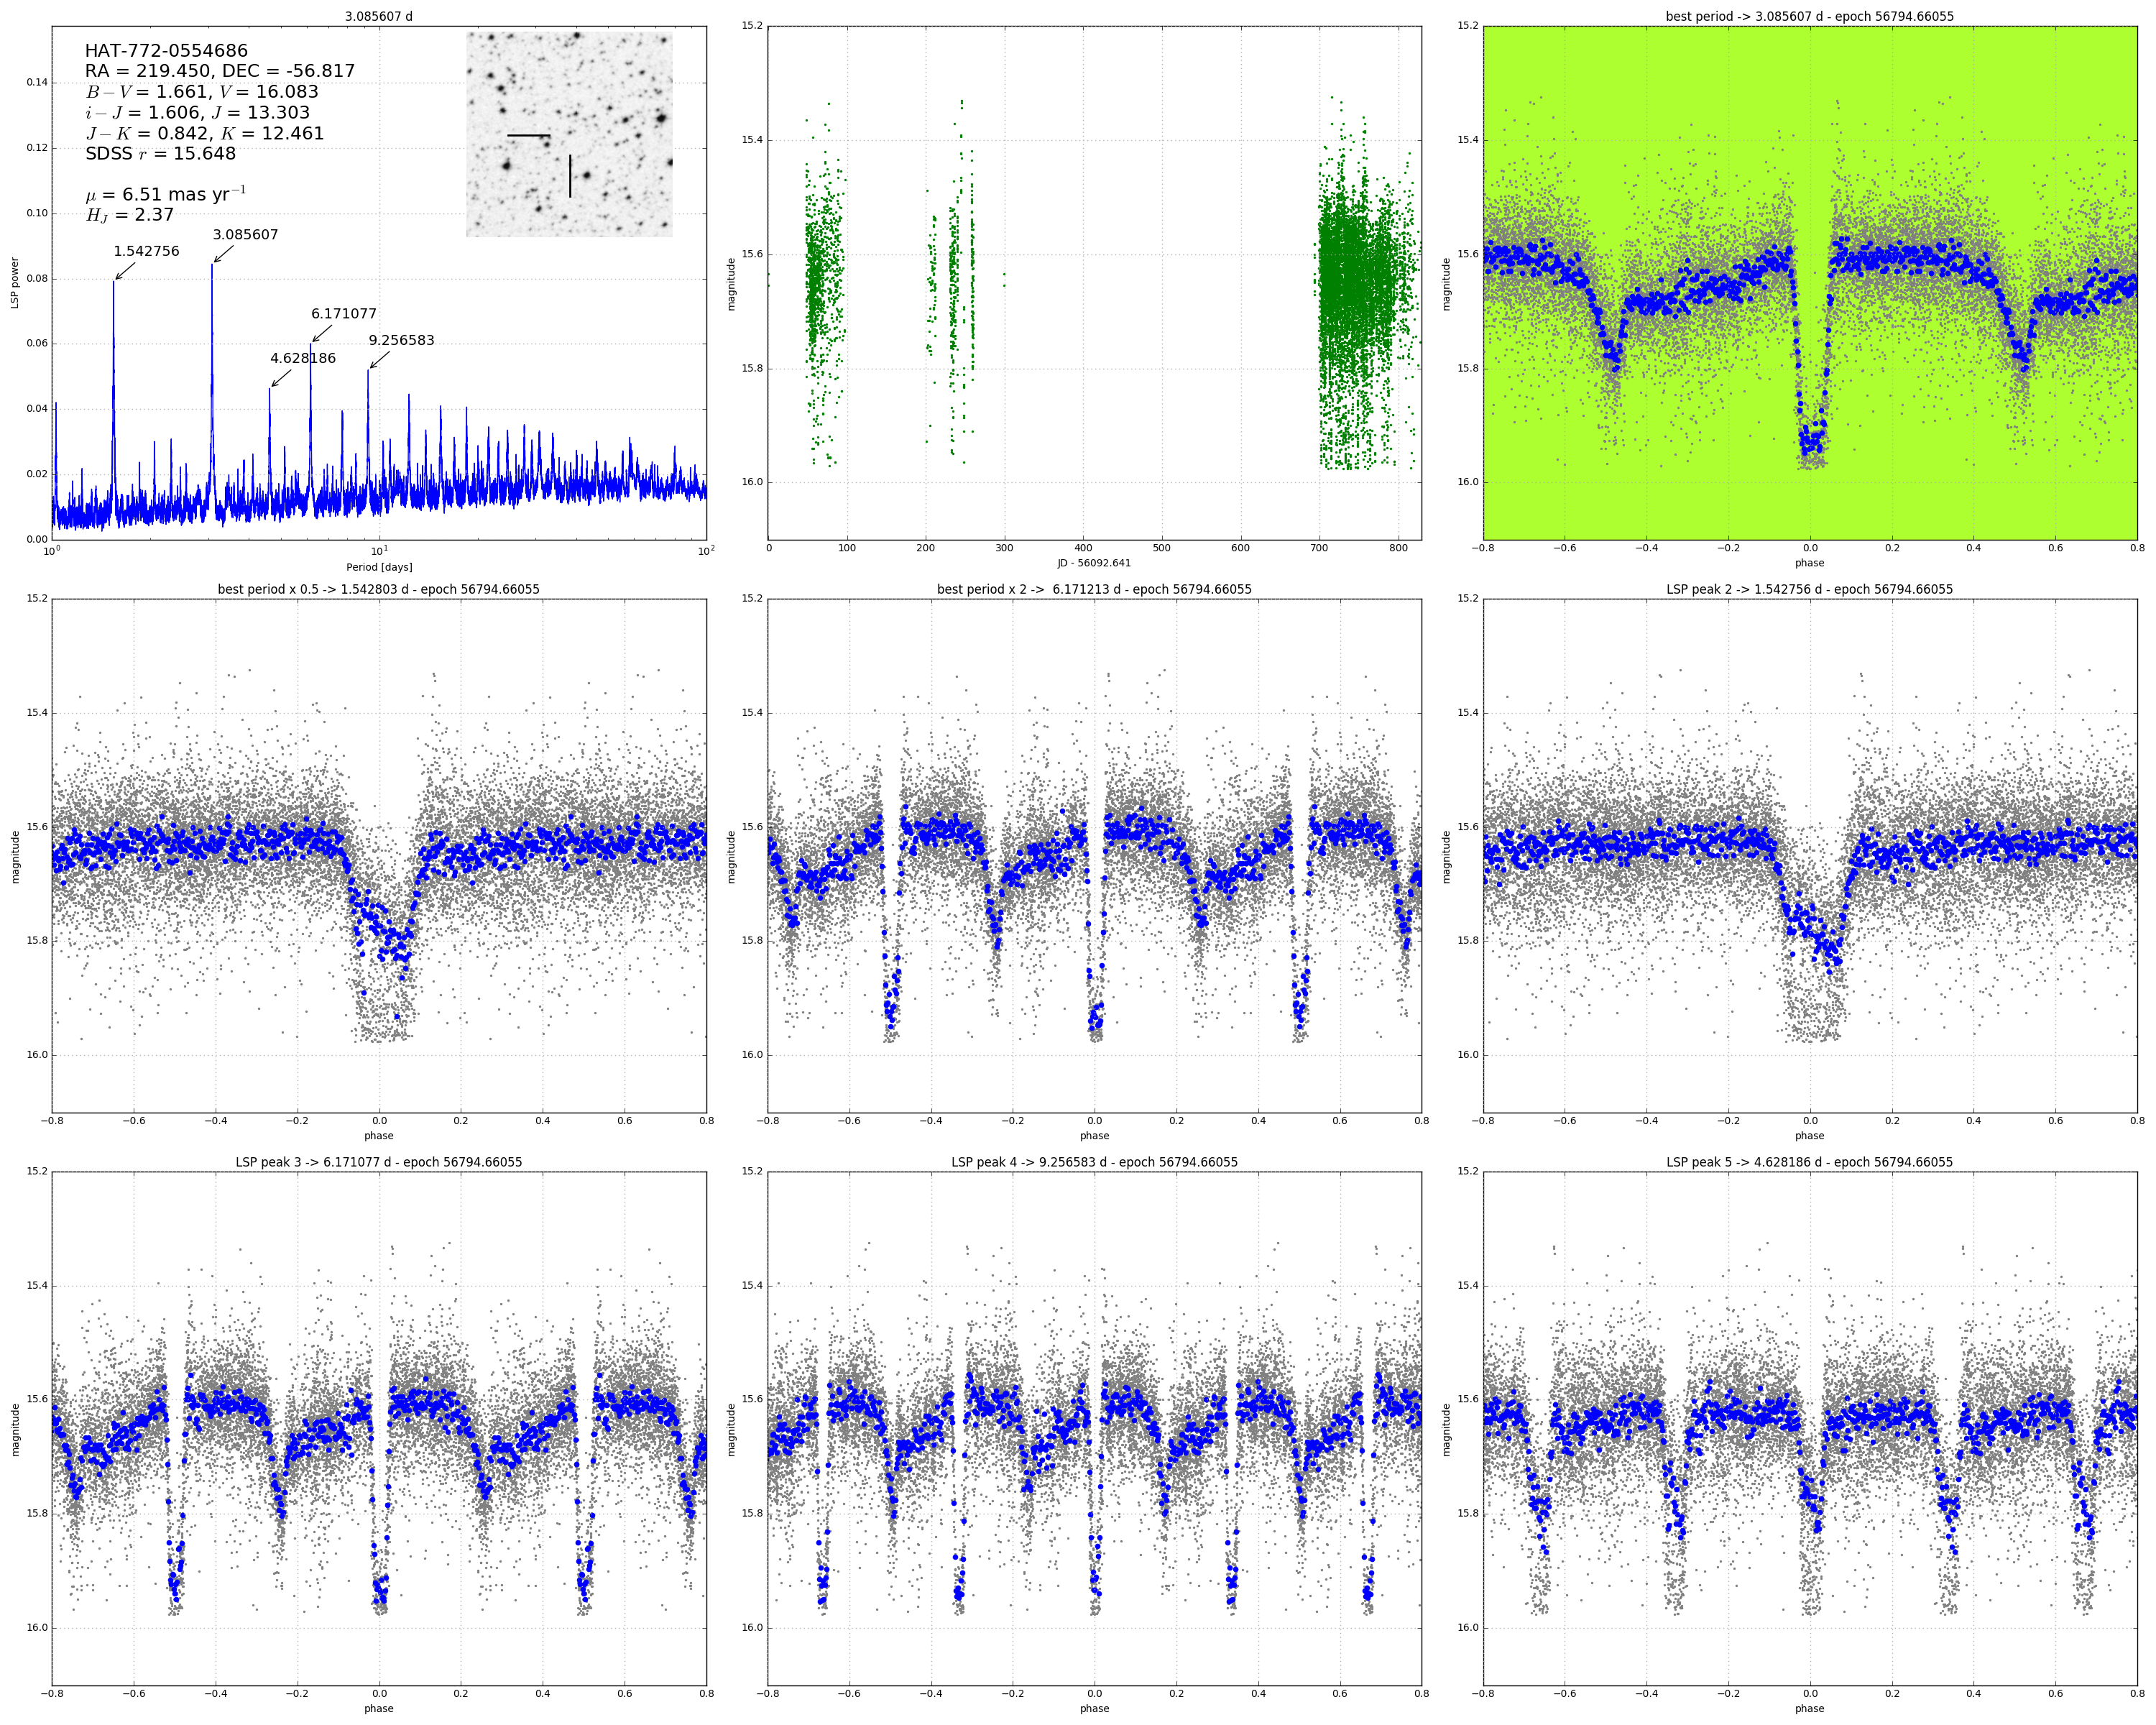

In [19]:
# make another checkplot
cp = plotbase.make_checkplot(blsp, times, mags, errs, objectinfo=normlcd['objectinfo'])
Image('checkplot.png')